# 課題7: ダイナミックレンジの拡大
画素のダイナミックレンジを0から255にせよ。

原画像の濃度値の最小値が、出力画像の濃度値の0、最大値が出力画像の濃度値の255となるように、濃度値を変換する。入力画像を $f(i,j)$、出力画像を $g(i,j)$ とすると、この変換は次のように表される。

$$
\begin{eqnarray*}
g(i,j) &=& \frac{f(i,j) - a}{a - b} \cdot 255 \\
a &=& \min f(i,j) \\
b &=& \max f(i,j)
\end{eqnarray*}
$$

この変換をプログラムで行っていく。課題6までで使用した画像は、課題4の結果から、0から254のダイナミックレンジを持っており、違いがわかりにくいと予想されるので、別の画像を用意した。この実験で使用する原画像を図1に示す。

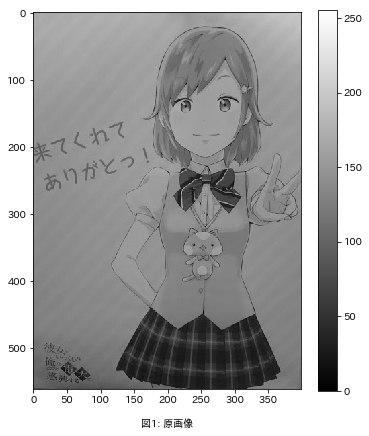

In [1]:
# 環境準備
%run -i prelude.ipynb

# 画像を読み込む
original = PIL.Image.open(IMAGE2_PATH)

# グレースケールに変換
original = np.array(original.convert(mode='L'))

# 表示
def imshow(img, vmax, title):
    fig, ax = plt.subplots(figsize=(6, 7))
    m = ax.imshow(img, cmap='gray', vmin=0, vmax=vmax)
    fig.colorbar(m)
    ax.text(0.5, -0.08, title,
            transform=ax.transAxes,
            horizontalalignment='center',
            verticalalignment='top')

imshow(original, 255, '図1: 原画像')

最初に、原画像のヒストグラムを図2に示す。

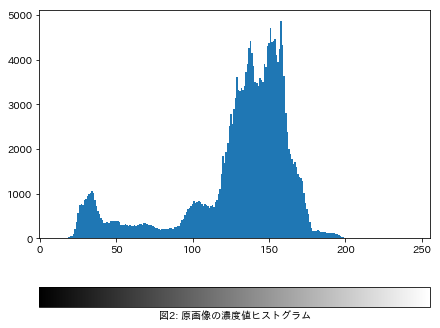

In [2]:
# 課題4のヒストグラム作成プログラムを関数化したもの
def imhist(img, title):
    # 濃度値0から255について、階級を1ずつ区切った、ヒストグラムを計算
    hist = np.histogram(img.ravel(), bins=256, range=(0, 256))[0]

    # グラフを作成
    fig, ax = plt.subplots(figsize=(7, 6))

    # x軸の0から255の位置に、度数の棒グラフを作成する
    ax.bar(np.arange(256), hist, align='center', width=1)

    # 表示範囲
    ax.set_xlim(left=-0.5, right=255.5)

    # カラーバーを表示
    mappable = matplotlib.cm.ScalarMappable(
        cmap=matplotlib.cm.get_cmap('gray'),
        norm=matplotlib.colors.Normalize(vmin=0, vmax=255))
    mappable.set_array([])
    colorbar = ax.get_figure().colorbar(mappable, ax=ax, orientation='horizontal')
    colorbar.set_ticks([])

    # カラーバーの下に図のタイトル
    colorbar.set_label(title)

imhist(original, '図2: 原画像の濃度値ヒストグラム')

また、濃度値の最小、最大を調べておく。

In [3]:
mn = original.min()
mx = original.max()

print('原画像の濃度値の最小 :', mn)
print('原画像の濃度値の最大 :', mx)

原画像の濃度値の最小 : 1
原画像の濃度値の最大 : 200


このことから、この実験では、ダイナミックレンジ1から200の画像を、0から255になるように変換することになる。先程示した式に従って、次のプログラムで変換を行うことができる。

In [4]:
new_img = (original - mn) / (mx - mn) * 255

変換結果を図3に示す。また、その濃度ヒストグラムを図4に示す。

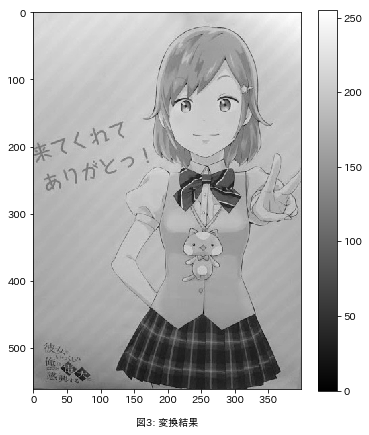

In [5]:
imshow(new_img, 255, '図3: 変換結果')

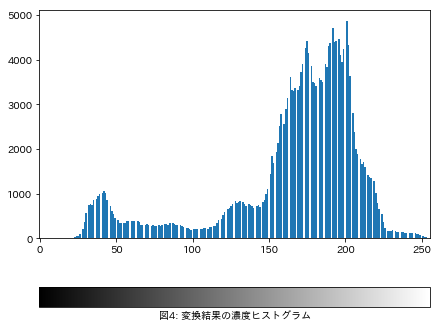

In [6]:
imhist(new_img, '図4: 変換結果の濃度ヒストグラム')

図1と図3を比較すると、図3のほうが明るくなった印象を受ける。これは、ダイナミックレンジの上限を200から255に上昇させた影響だと考えられる。

図4より、濃度値が20以下の画素はほとんどないことがわかる。したがって、原画像のごくわずかな黒い画素によって、最小値が小さく出てしまい、ダイナミックレンジの拡張を行っても、暗い方向への拡張はほとんど行うことができなかったものと考えられる。